In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from google.colab import files

In [ ]:
uploaded =  files.upload()

Saving adult_income.csv to adult_income.csv


In [ ]:
df = pd.read_csv("adult_income.csv")

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df.duplicated().sum()

52

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.iloc[4]

,4
age,18
workclass,?
fnlwgt,103497
education,Some-college
educational-num,10
marital-status,Never-married
occupation,?
relationship,Own-child
race,White
gender,Female


In [ ]:
df.isna().sum() / df.shape[0] *100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
df.isna().sum() / df.shape[0] *100

,0
age,0.000000
workclass,5.728633
fnlwgt,0.000000
education,0.000000
educational-num,0.000000
marital-status,0.000000
occupation,5.749129
relationship,0.000000
race,0.000000
gender,0.000000


In [ ]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)

<ipython-input-14-217bf3e9b35b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
<ipython-input-14-217bf3e9b35b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
df.isna().sum() / df.shape[0] * 100

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


In [ ]:
mappings = {
    'workclass': {
        'Private': 0,
        'Federal-gov': 1,
        'Local-gov': 2,
        'Never-worked': 3,
        'Self-emp-inc': 4,
        'Self-emp-not-inc': 5,
        'State-gov': 6,
        'Without-pay': 7,
    },
    'gender': {
        'Female': 0,
        'Male': 1
    },
    'education': {
        '10th': 0,
        '11th': 1,
        '12th': 2,
        '1st-4th': 3,
        '5th-6th': 4,
        '7th-8th': 5,
        '9th': 6,
        'Assoc-acdm': 7,
        'Assoc-voc': 8,
        'Bachelors': 9,
        'HS-grad': 10,
        'Masters': 11,
        'Preschool': 12,
        'Prof-school': 13,
        'Some-college': 14,
        'Doctorate': 15,
    },
    'marital-status': {
        'Divorced': 0,
        'Married-AF-spouse': 1,
        'Married-civ-spouse': 2,
        'Married-spouse-absent': 3,
        'Never-married': 4,
        'Separated': 5,
        'Widowed': 6,
    },
    'occupation': {
        'Adm-clerical': 0,
        'Armed-Forces': 1,
        'Craft-repair': 2,
        'Exec-managerial': 3,
        'Farming-fishing': 4,
        'Handlers-cleaners': 5,
        'Machine-op-inspct': 6,
        'Other-service': 7,
        'Priv-house-serv': 8,
        'Prof-specialty': 9,
        'Protective-serv': 10,
        'Sales': 11,
        'Tech-support': 12,
        'Transport-moving': 13,
    },
    'relationship': {
        'Husband': 0,
        'Not-in-family': 1,
        'Other-relative': 2,
        'Own-child': 3,
        'Unmarried': 4,
        'Wife': 5,
    },
    'race': {
        'Amer-Indian-Eskimo': 0,
        'Asian-Pac-Islander': 1,
        'Black': 2,
        'Other': 3,
        'White': 4,
    },
    'native-country': {
        'Cambodia': 855,
      'Canada': 1,
      'China': 86,
      'Columbia': 57,
      'Cuba': 53,
      'Dominican-Republic': 809,
      'Ecuador': 593,
      'El-Salvador': 503,
      'England': 44,
      'France': 33,
      'Germany': 49,
      'Greece': 30,
      'Guatemala': 502,
      'Haiti': 509,
      'Holand-Netherlands': 31,
      'Honduras': 504,
      'Hong': 852,
      'Hungary': 36,
      'India': 91,
      'Iran': 98,
      'Ireland': 353,
      'Italy': 39,
      'Jamaica': 876,
      'Japan': 81,
      'Laos': 856,
      'Mexico': 52,
      'Nicaragua': 505,
      'Outlying-US(Guam-USVI-etc)': 1,
      'Peru': 51,
      'Philippines': 63,
      'Poland': 48,
      'Portugal': 351,
      'Puerto-Rico': 787,
      'Scotland': 44,
      'South': 27,
      'Taiwan': 886,
      'Thailand': 66,
      'Trinadad&Tobago': 868,
      'United-States': 1,
      'Vietnam': 84,
      'Yugoslavia': 381,
     }
  }


In [ ]:
for column, mapping_dict in mappings.items():
    df[column] = df[column].map(mapping_dict)

In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,0,226802,1,7,4,6,3,2,1,0,0,40,1,<=50K
1,38,0,89814,10,9,2,4,0,4,1,0,0,50,1,<=50K
2,28,2,336951,7,12,2,10,0,4,1,0,0,40,1,>50K
3,44,0,160323,14,10,2,6,0,2,1,7688,0,40,1,>50K
4,18,0,103497,14,10,4,9,3,4,0,0,0,30,1,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,0,257302,7,12,2,12,5,4,0,0,0,38,1,<=50K
48838,40,0,154374,10,9,2,6,0,4,1,0,0,40,1,>50K
48839,58,0,151910,10,9,6,0,4,4,0,0,0,40,1,<=50K
48840,22,0,201490,10,9,4,0,3,4,1,0,0,20,1,<=50K


<Axes: xlabel='capital-gain', ylabel='Count'>

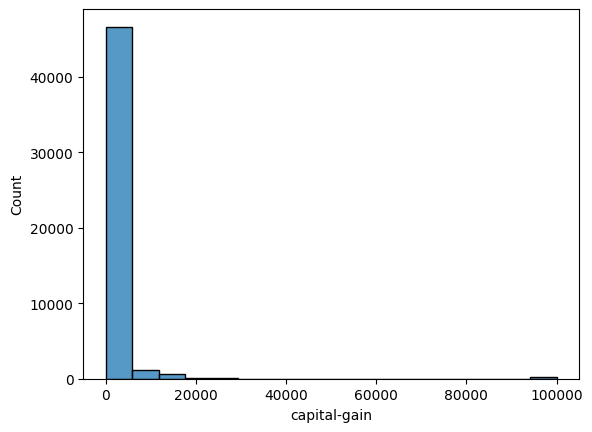

In [ ]:
sns.histplot(data=df, x='capital-gain')

<Axes: xlabel='capital-loss', ylabel='Count'>

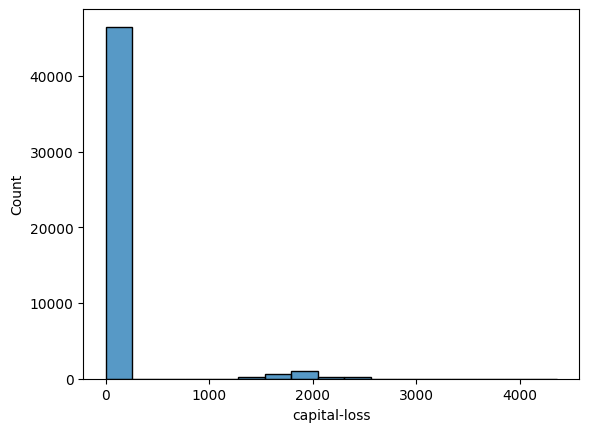

In [ ]:
sns.histplot(data=df, x='capital-loss')

<Axes: xlabel='workclass', ylabel='Count'>

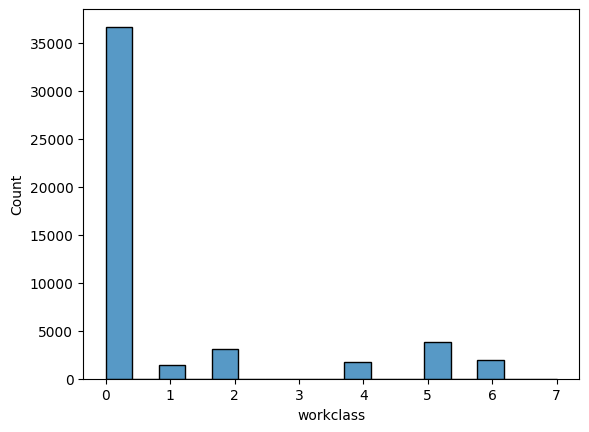

In [ ]:
sns.histplot(data=df, x='workclass')

<Axes: xlabel='fnlwgt', ylabel='Count'>

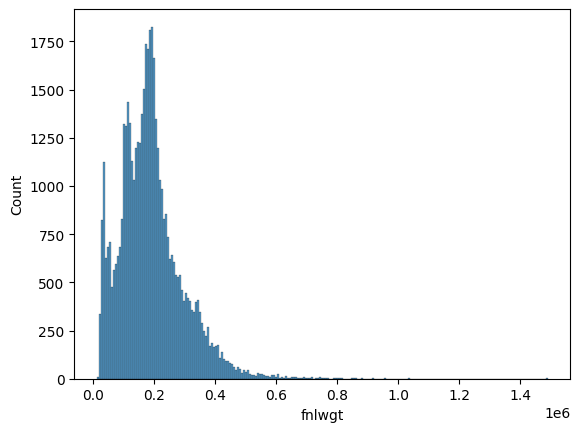

In [ ]:
sns.histplot(data=df, x='fnlwgt')

<Axes: xlabel='relationship', ylabel='Count'>

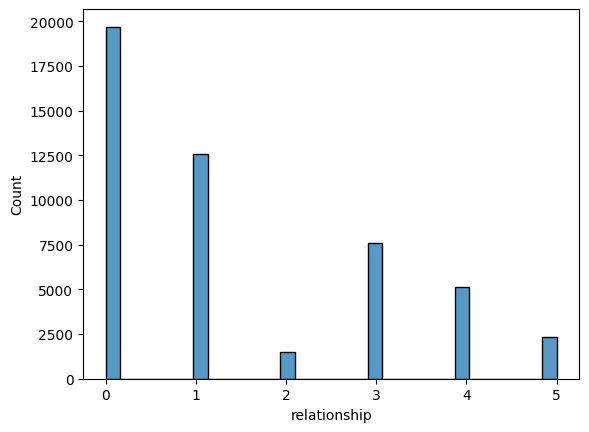

In [ ]:
sns.histplot(data=df, x='relationship')

<Axes: xlabel='income', ylabel='count'>

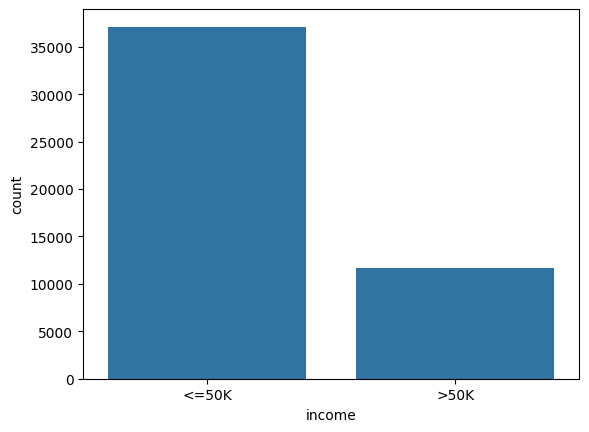

In [ ]:
sns.countplot(data=df, x='income')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

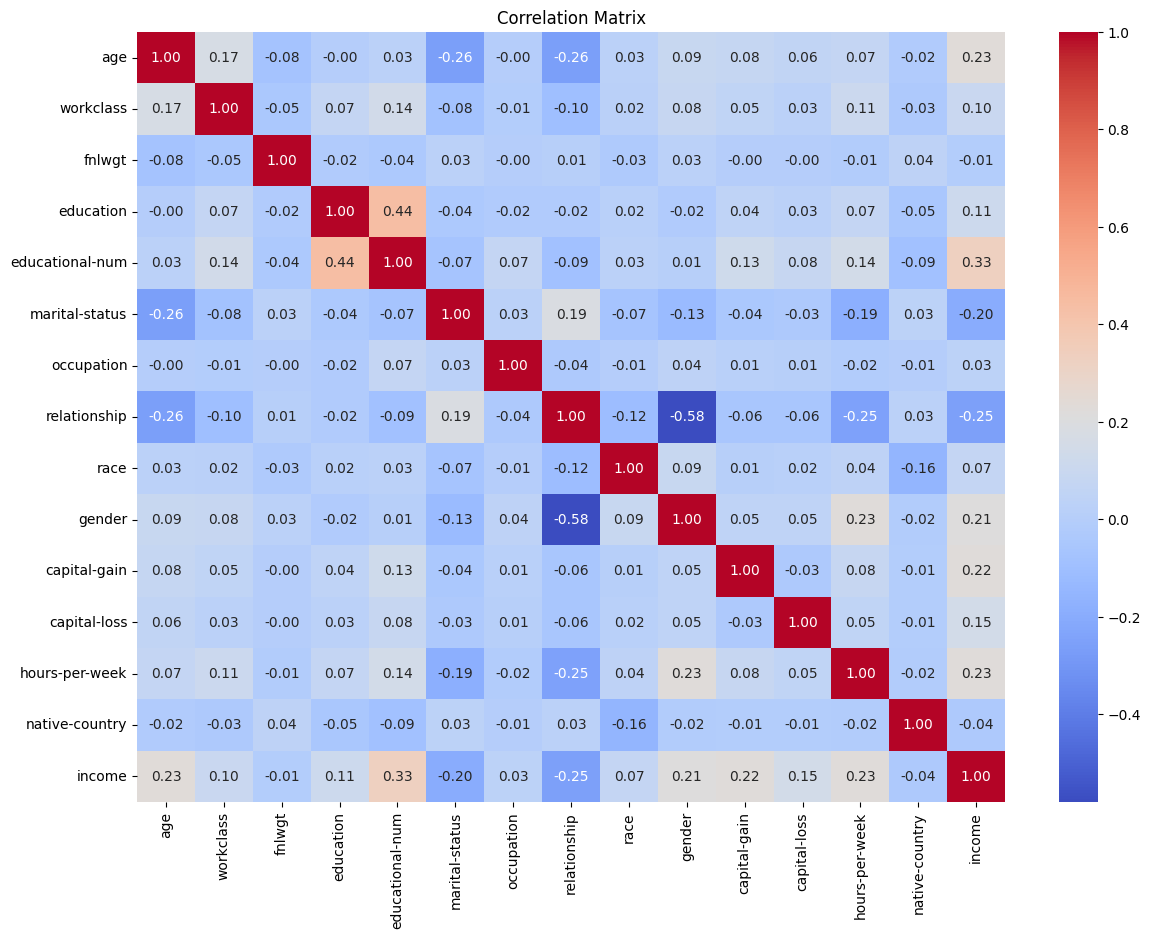

In [ ]:
df['income'] = le.fit_transform(df['income'])
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df1 = df.drop(['native-country', 'race', 'occupation', 'fnlwgt', 'workclass', 'education'], axis=1)

<Axes: xlabel='income', ylabel='age'>

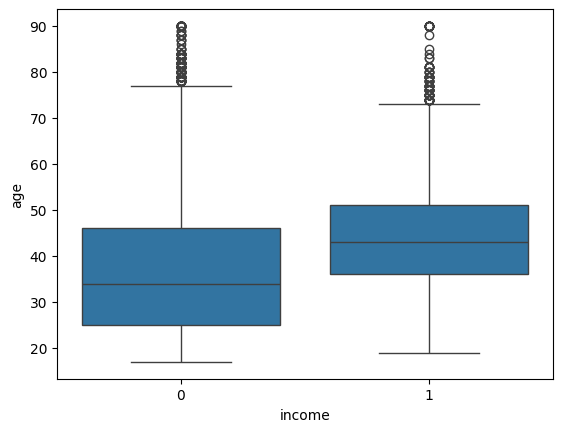

In [ ]:
sns.boxplot(x='income', y='age', data=df)

<Axes: xlabel='income', ylabel='hours-per-week'>

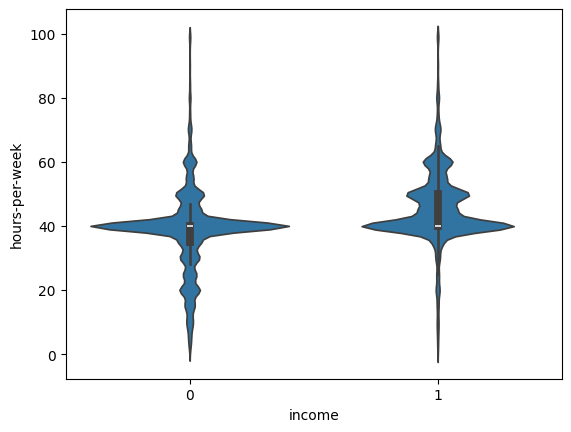

In [ ]:
sns.violinplot(x='income', y='hours-per-week', data=df)

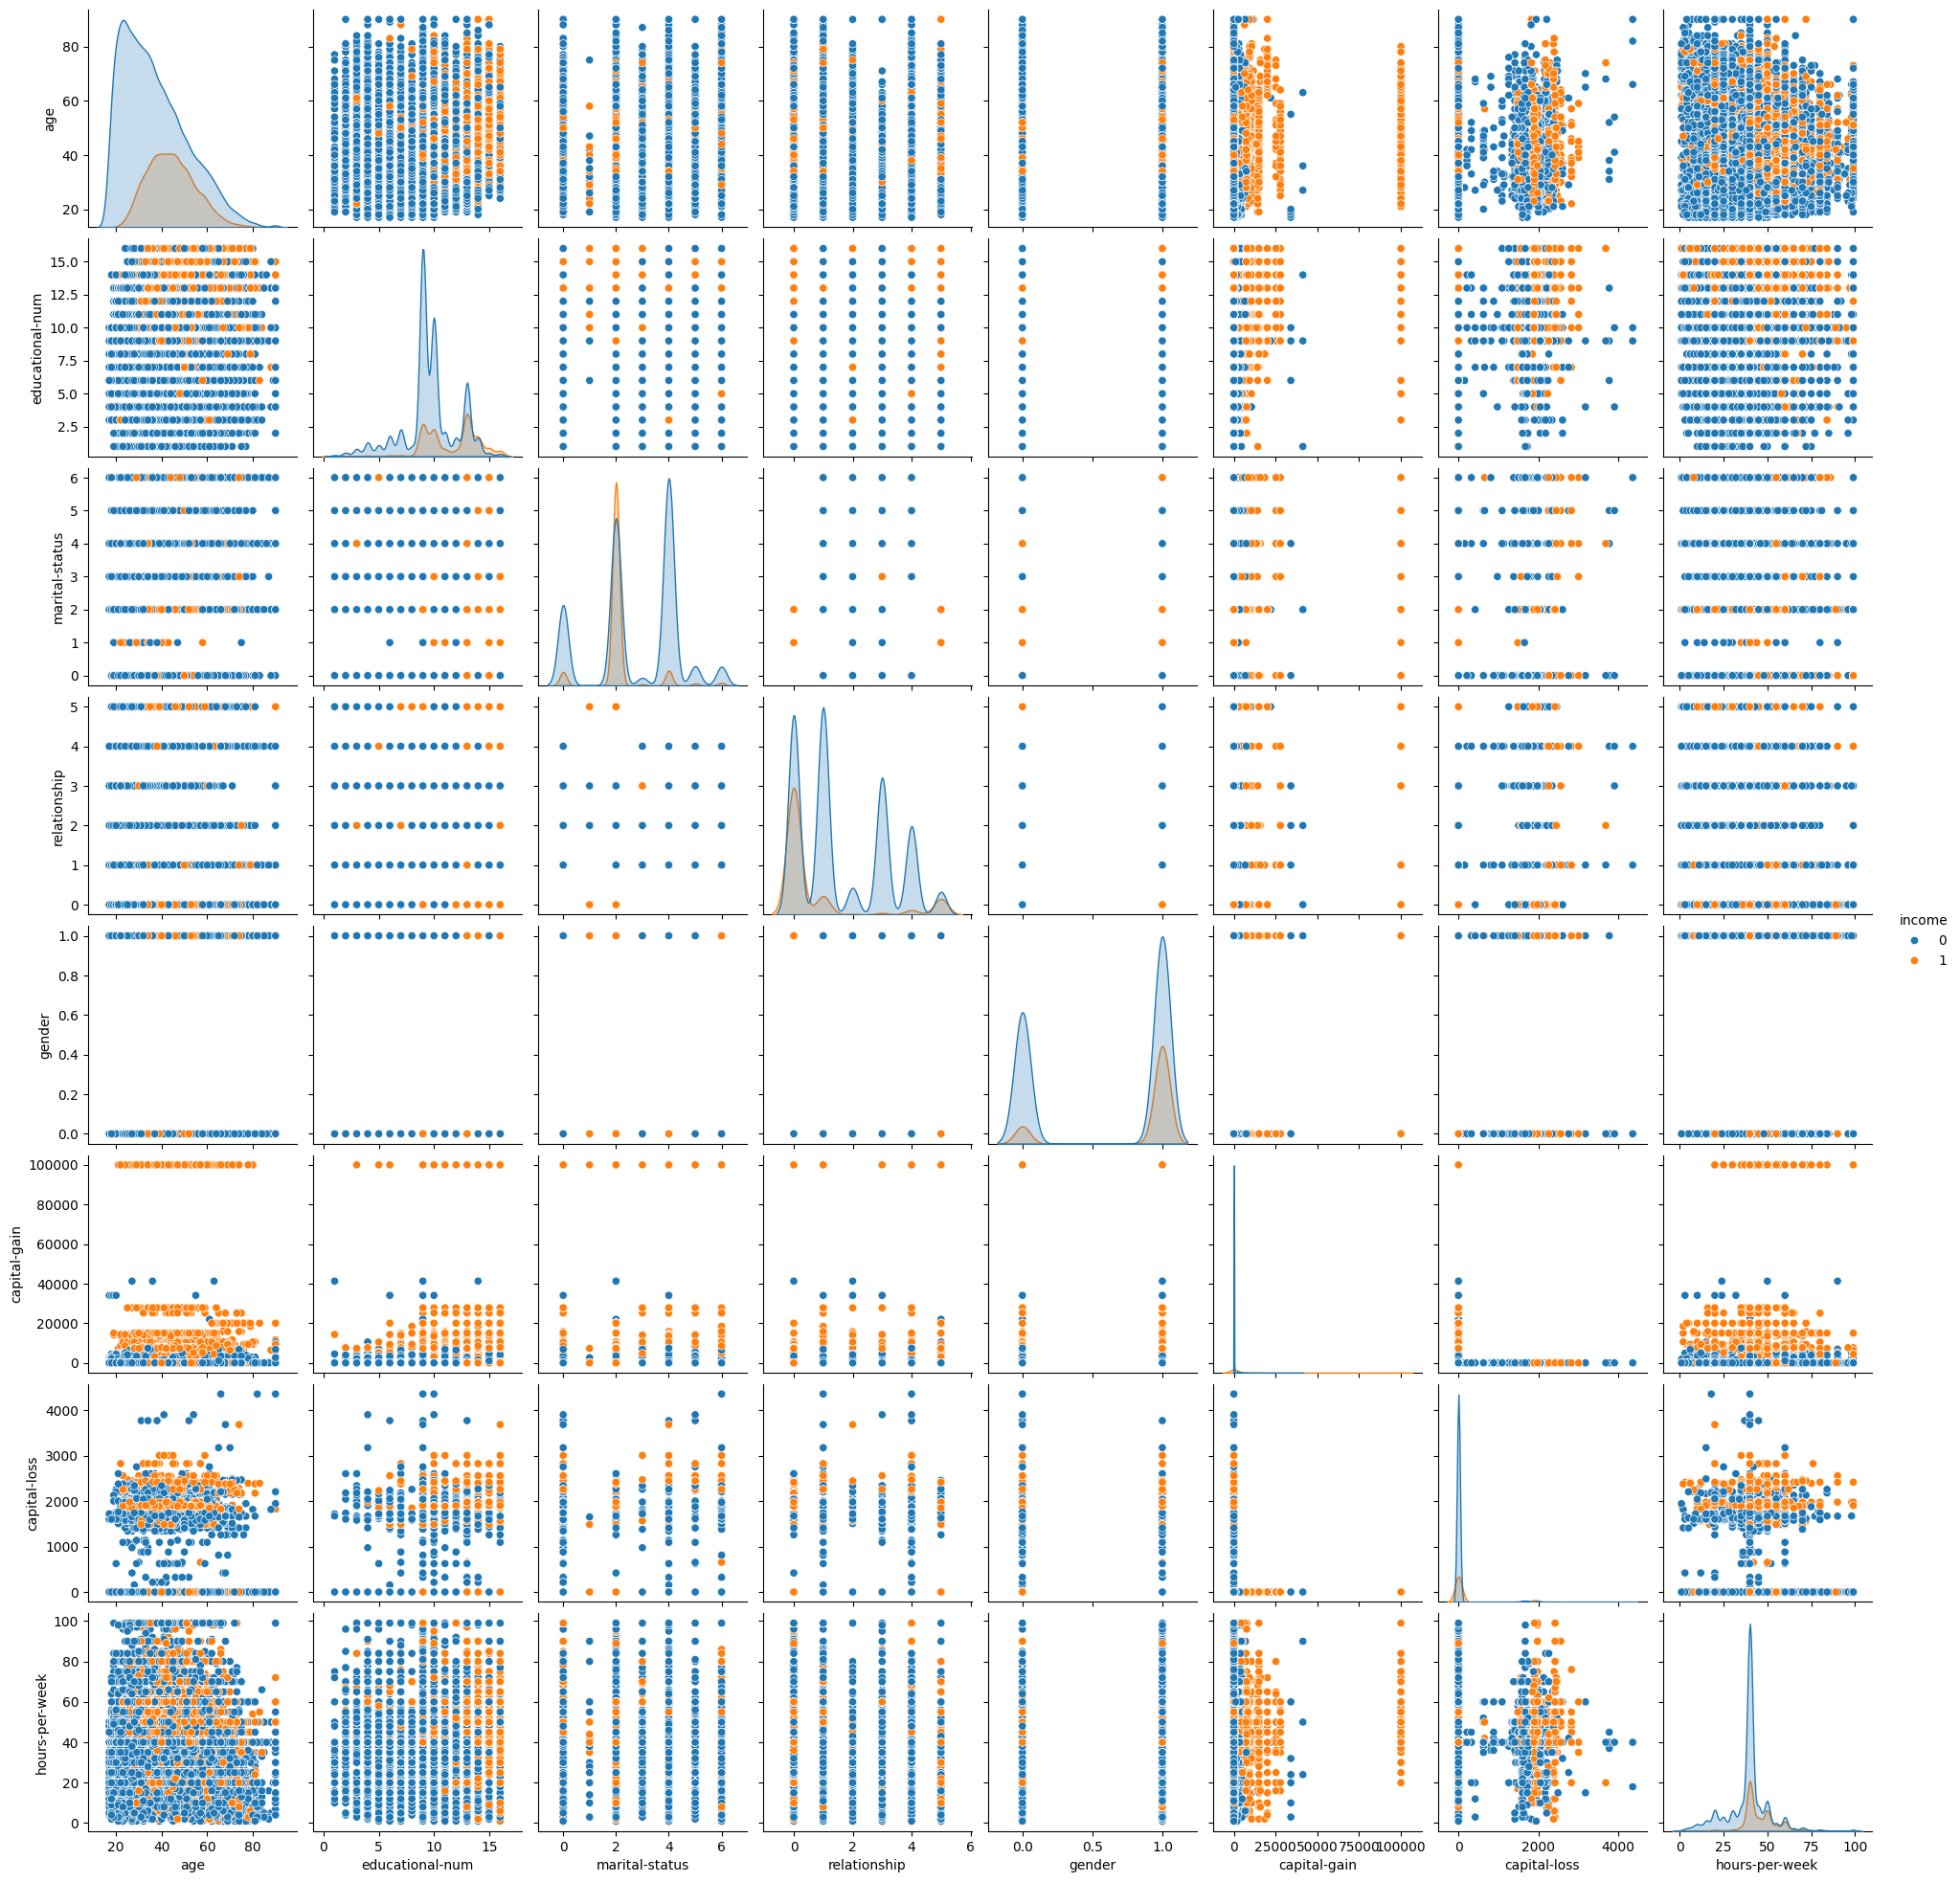

In [ ]:
sns.pairplot(data=df1, hue='income')

In [ ]:
from imblearn.combine import SMOTETomek

In [ ]:
smote = SMOTETomek(random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = df1.drop('income', axis=1)
y = df1['income']

y = le.fit_transform(y)

X_res, y_res = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1234)

In [ ]:
clf1 = DTC()
clf1.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_clf1 = clf1.predict(X_test)

In [ ]:
recall_clf1 = recall_score(y_true=y_test, y_pred=y_pred_clf1)
precision_clf1 = precision_score(y_true=y_test, y_pred=y_pred_clf1)
F1_clf1 = f1_score(y_true=y_test, y_pred=y_pred_clf1)

print('Recall Score Decision Tree Classifier is: ', recall_clf1)
print('Precision Score Decision Tree Classifier is: ', precision_clf1)
print('F1 Score Decision Tree Classifier is: ', F1_clf1)

Recall Score Decision Tree Classifier is:  0.8887386778423685
Precision Score Decision Tree Classifier is:  0.8256719417231851
F1 Score Decision Tree Classifier is:  0.8560453154502247


In [ ]:
clf2 = RFC(60, min_samples_split=5)
clf2.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=5, n_estimators=60)

In [ ]:
y_pred_clf2 = clf2.predict(X_test)

In [ ]:
recall_clf2 = recall_score(y_true=y_test, y_pred=y_pred_clf2)
precision_clf2 = precision_score(y_true=y_test, y_pred=y_pred_clf2)
F1_clf2 = f1_score(y_true=y_test, y_pred=y_pred_clf2)

print('Recall Score Decision Random Forest Classifier is: ', recall_clf2)
print('Precision Score Random Forest Classifier is: ', precision_clf2)
print('F1 Score Random Forest Classifier is: ', F1_clf2)

Recall Score Decision Random Forest Classifier is:  0.9036095714478842
Precision Score Random Forest Classifier is:  0.8368598973331663
F1 Score Random Forest Classifier is:  0.8689547581903276


In [ ]:
clf3 = GBC(n_estimators=50, subsample=0.9, max_depth=7)
clf3.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, n_estimators=50, subsample=0.9)

In [ ]:
y_pred_clf3 = clf3.predict(X_test)

In [ ]:
recall_clf3 = recall_score(y_true=y_test, y_pred=y_pred_clf3)
precision_clf3 = precision_score(y_true=y_test, y_pred=y_pred_clf3)
F1_clf3 = f1_score(y_true=y_test, y_pred=y_pred_clf3)

print('Recall Score Gradient Boosting Classifier is: ', recall_clf3)
print('Precision Score Gradient Boosting Classifier is: ', precision_clf3)
print('F1 Score Gradient Boosting Classifier is: ', F1_clf3)

Recall Score Gradient Boosting Classifier is:  0.8992834933080979
Precision Score Gradient Boosting Classifier is:  0.8257199602780536
F1 Score Gradient Boosting Classifier is:  0.8609331521387433


In [ ]:
param_grids = {
    'SVM': {
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf']
    },
    'Gradient Boosting': {
        'model': [GBC()],
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1, 0.5]
    },
    'Random Forest': {
        'model': [RFC()],
        'model__n_estimators': [100, 200],
        'model__max_depth': [None, 10, 20]
    },
    'Logistic Regression': {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10]
    },
    'Decision Tree': {
        'model': [DTC()],
        'model__max_depth': [None, 10, 20]
    }
}

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

best_estimators = {}
for name, param_grid in param_grids.items():
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', param_grid['model'][0])])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"{name} best score: {grid_search.best_score_}")

SVM best score: 0.8293117148637137
Gradient Boosting best score: 0.8503868448604337
Random Forest best score: 0.85695377266867
Logistic Regression best score: 0.7621496435305495
Decision Tree best score: 0.8442442298130466


In [ ]:
results = []

for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"{name} Test Precision: {precision}")
    print(f"{name} Test Recall: {recall}")
    print(f"{name} Test F1 Score: {f1}")

    results.append((name, precision, recall, f1))

# Determine the best model based on the F1 score
best_model = max(results, key=lambda x: x[3])  # Index 3 corresponds to F1 score
print(f"Best Model: {best_model[0]} with Precision: {best_model[1]}, Recall: {best_model[2]}, F1 Score: {best_model[3]}")

SVM Test Precision: 0.8002411091018686
SVM Test Recall: 0.8973908341219413
SVM Test F1 Score: 0.8460361967881723
Gradient Boosting Test Precision: 0.8296407560395543
Gradient Boosting Test Recall: 0.8960389347032581
Gradient Boosting Test F1 Score: 0.8615624593786559
Random Forest Test Precision: 0.8282456785582935
Random Forest Test Recall: 0.9133432472624037
Random Forest Test F1 Score: 0.8687154429728687
Logistic Regression Test Precision: 0.7745640741765846
Logistic Regression Test Recall: 0.756658104637015
Logistic Regression Test F1 Score: 0.7655063940367913
Decision Tree Test Precision: 0.825923134890731
Decision Tree Test Recall: 0.8890090577261052
Decision Tree Test F1 Score: 0.8563057490722052
Best Model: Random Forest with Precision: 0.8282456785582935, Recall: 0.9133432472624037, F1 Score: 0.8687154429728687
